# Potential and Field

In the previous notebook, you explored the effects and properties of the vector operations ***divergence***, ***gradient***, and ***curl***.  In this notebook, you will use these operations to explore relations between the electric field, the electrostatic potential, and the charge density.


## Zero Curl

Consider the following electric field:
$$
\vec{E} = (2xy^2 + z^3) \, \hat{\mathbf{e}}_x
        + (2x^2y) \, \hat{\mathbf{e}}_y
        + (3xz^2) \, \hat{\mathbf{e}}_z
$$

Show that $\nabla \times \vec{E} = 0$.

Adapt the methods of the previous notebook to do the following:

1. Define the vector field $\vec{E}$ on a 3D grid.
2. Plot $\vec{E}$.
3. Compute the curl, $\nabla \times \vec{E}$, on the same grid.
4. Demonstrate that $\nabla \times \vec{E} \approx 0$.

For Part 4, do not simply compute the curl.  You may not obtain strict equality in part 4 due to numerical error and edge effects, but you should provide some quantitative evidence that the curl is nearly zero nearly everywhere.

In [1]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Get access to custom functions.
import VectorCalculus as vc
import Electrodynamics as ed

from importlib import reload
reload(vc)
reload(ed)

<module 'Electrodynamics' from '/Users/lucasmiller/Documents/OIT/PHY 330 Magnetism/electrodynamics/week-02/Electrodynamics.py'>

In [4]:
## Use this command to turn ON interactive plots:
%matplotlib notebook

## Use this command to turn OFF interactive plots.
# %matplotlib inline

<IPython.core.display.Javascript object>


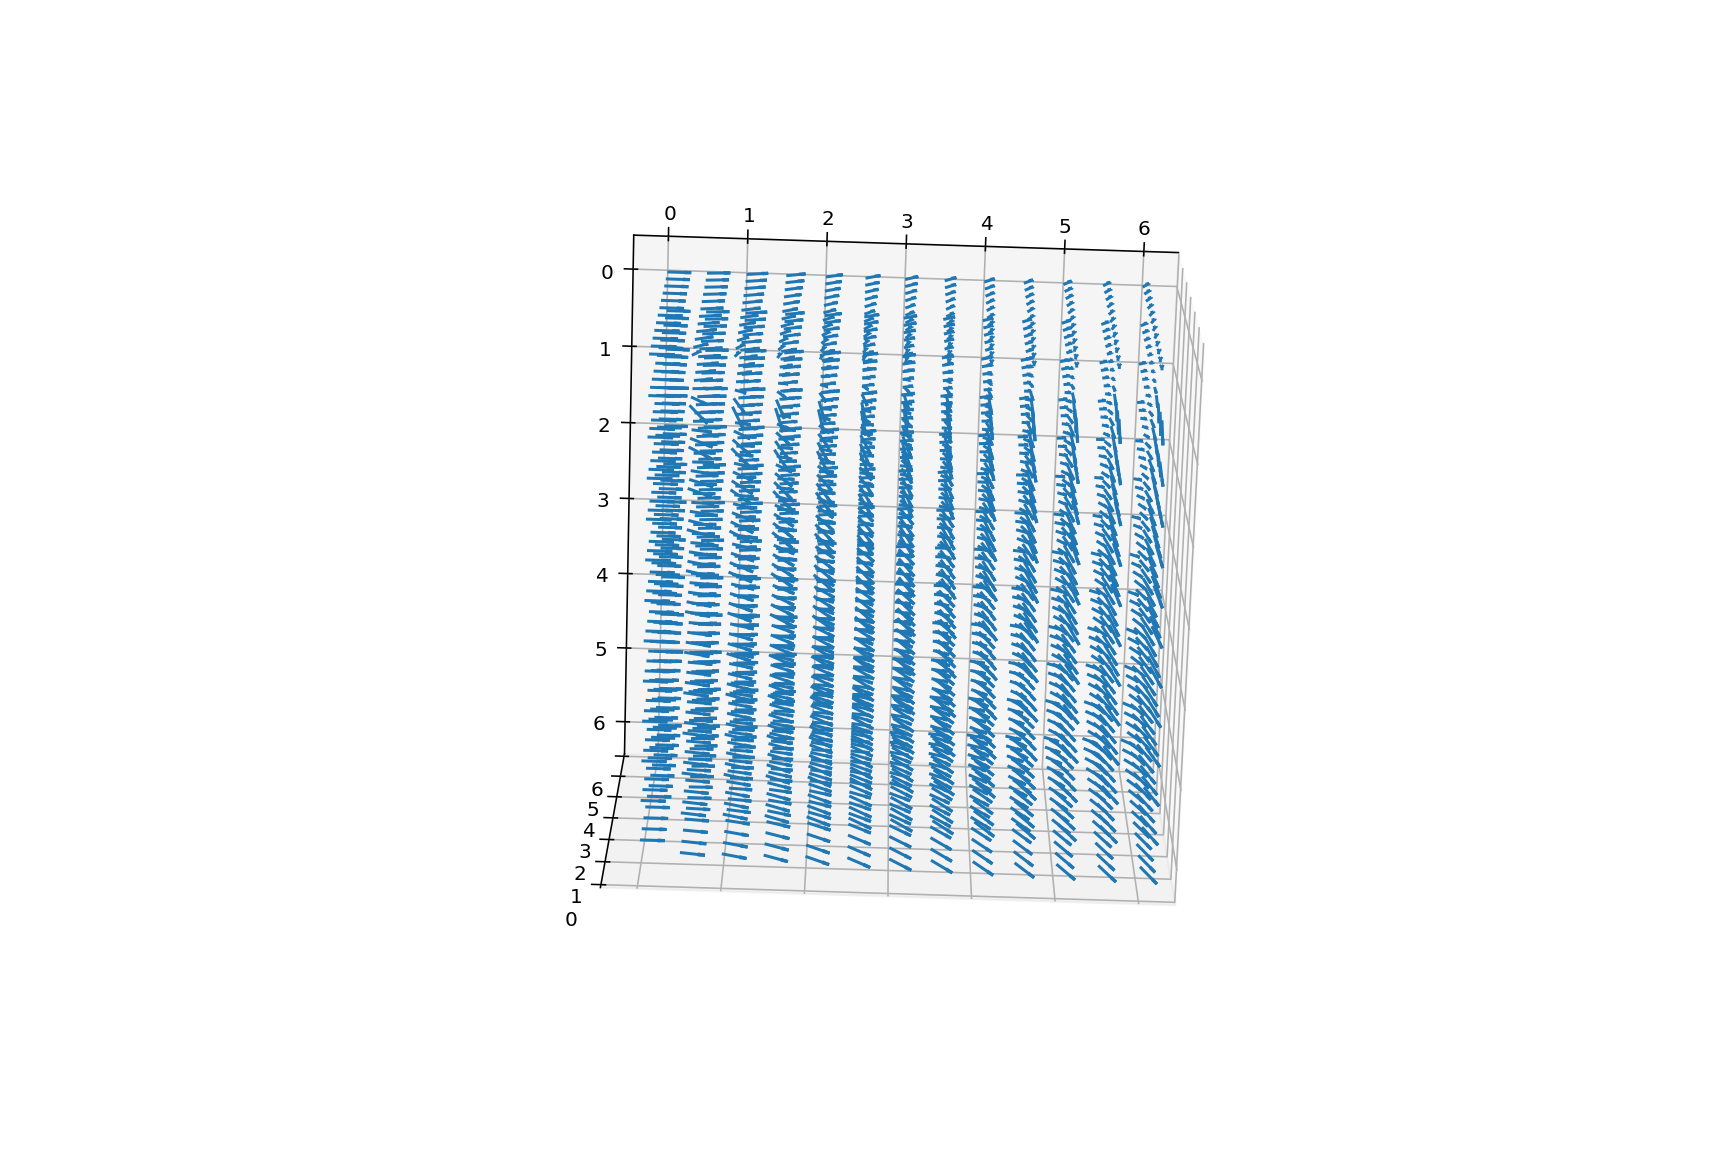

In [5]:
## Part 1 and 2: Defining and Plotting E
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
x, y, z = np.meshgrid(np.arange(0, 2*np.pi, .5), np.arange(0, 2*np.pi, .5), np.arange(0, 2*np.pi, .5))

F_x = 2 * x * y**2 + z**3
F_y = 2 * x**2 * y
F_z = 3 * x * z**2

fig = plt.figure()
ax = fig.gca(projection='3d')

Q = ax.quiver(x, y, z, F_x, F_y, F_z, length=0.3, normalize=True)

<IPython.core.display.Javascript object>


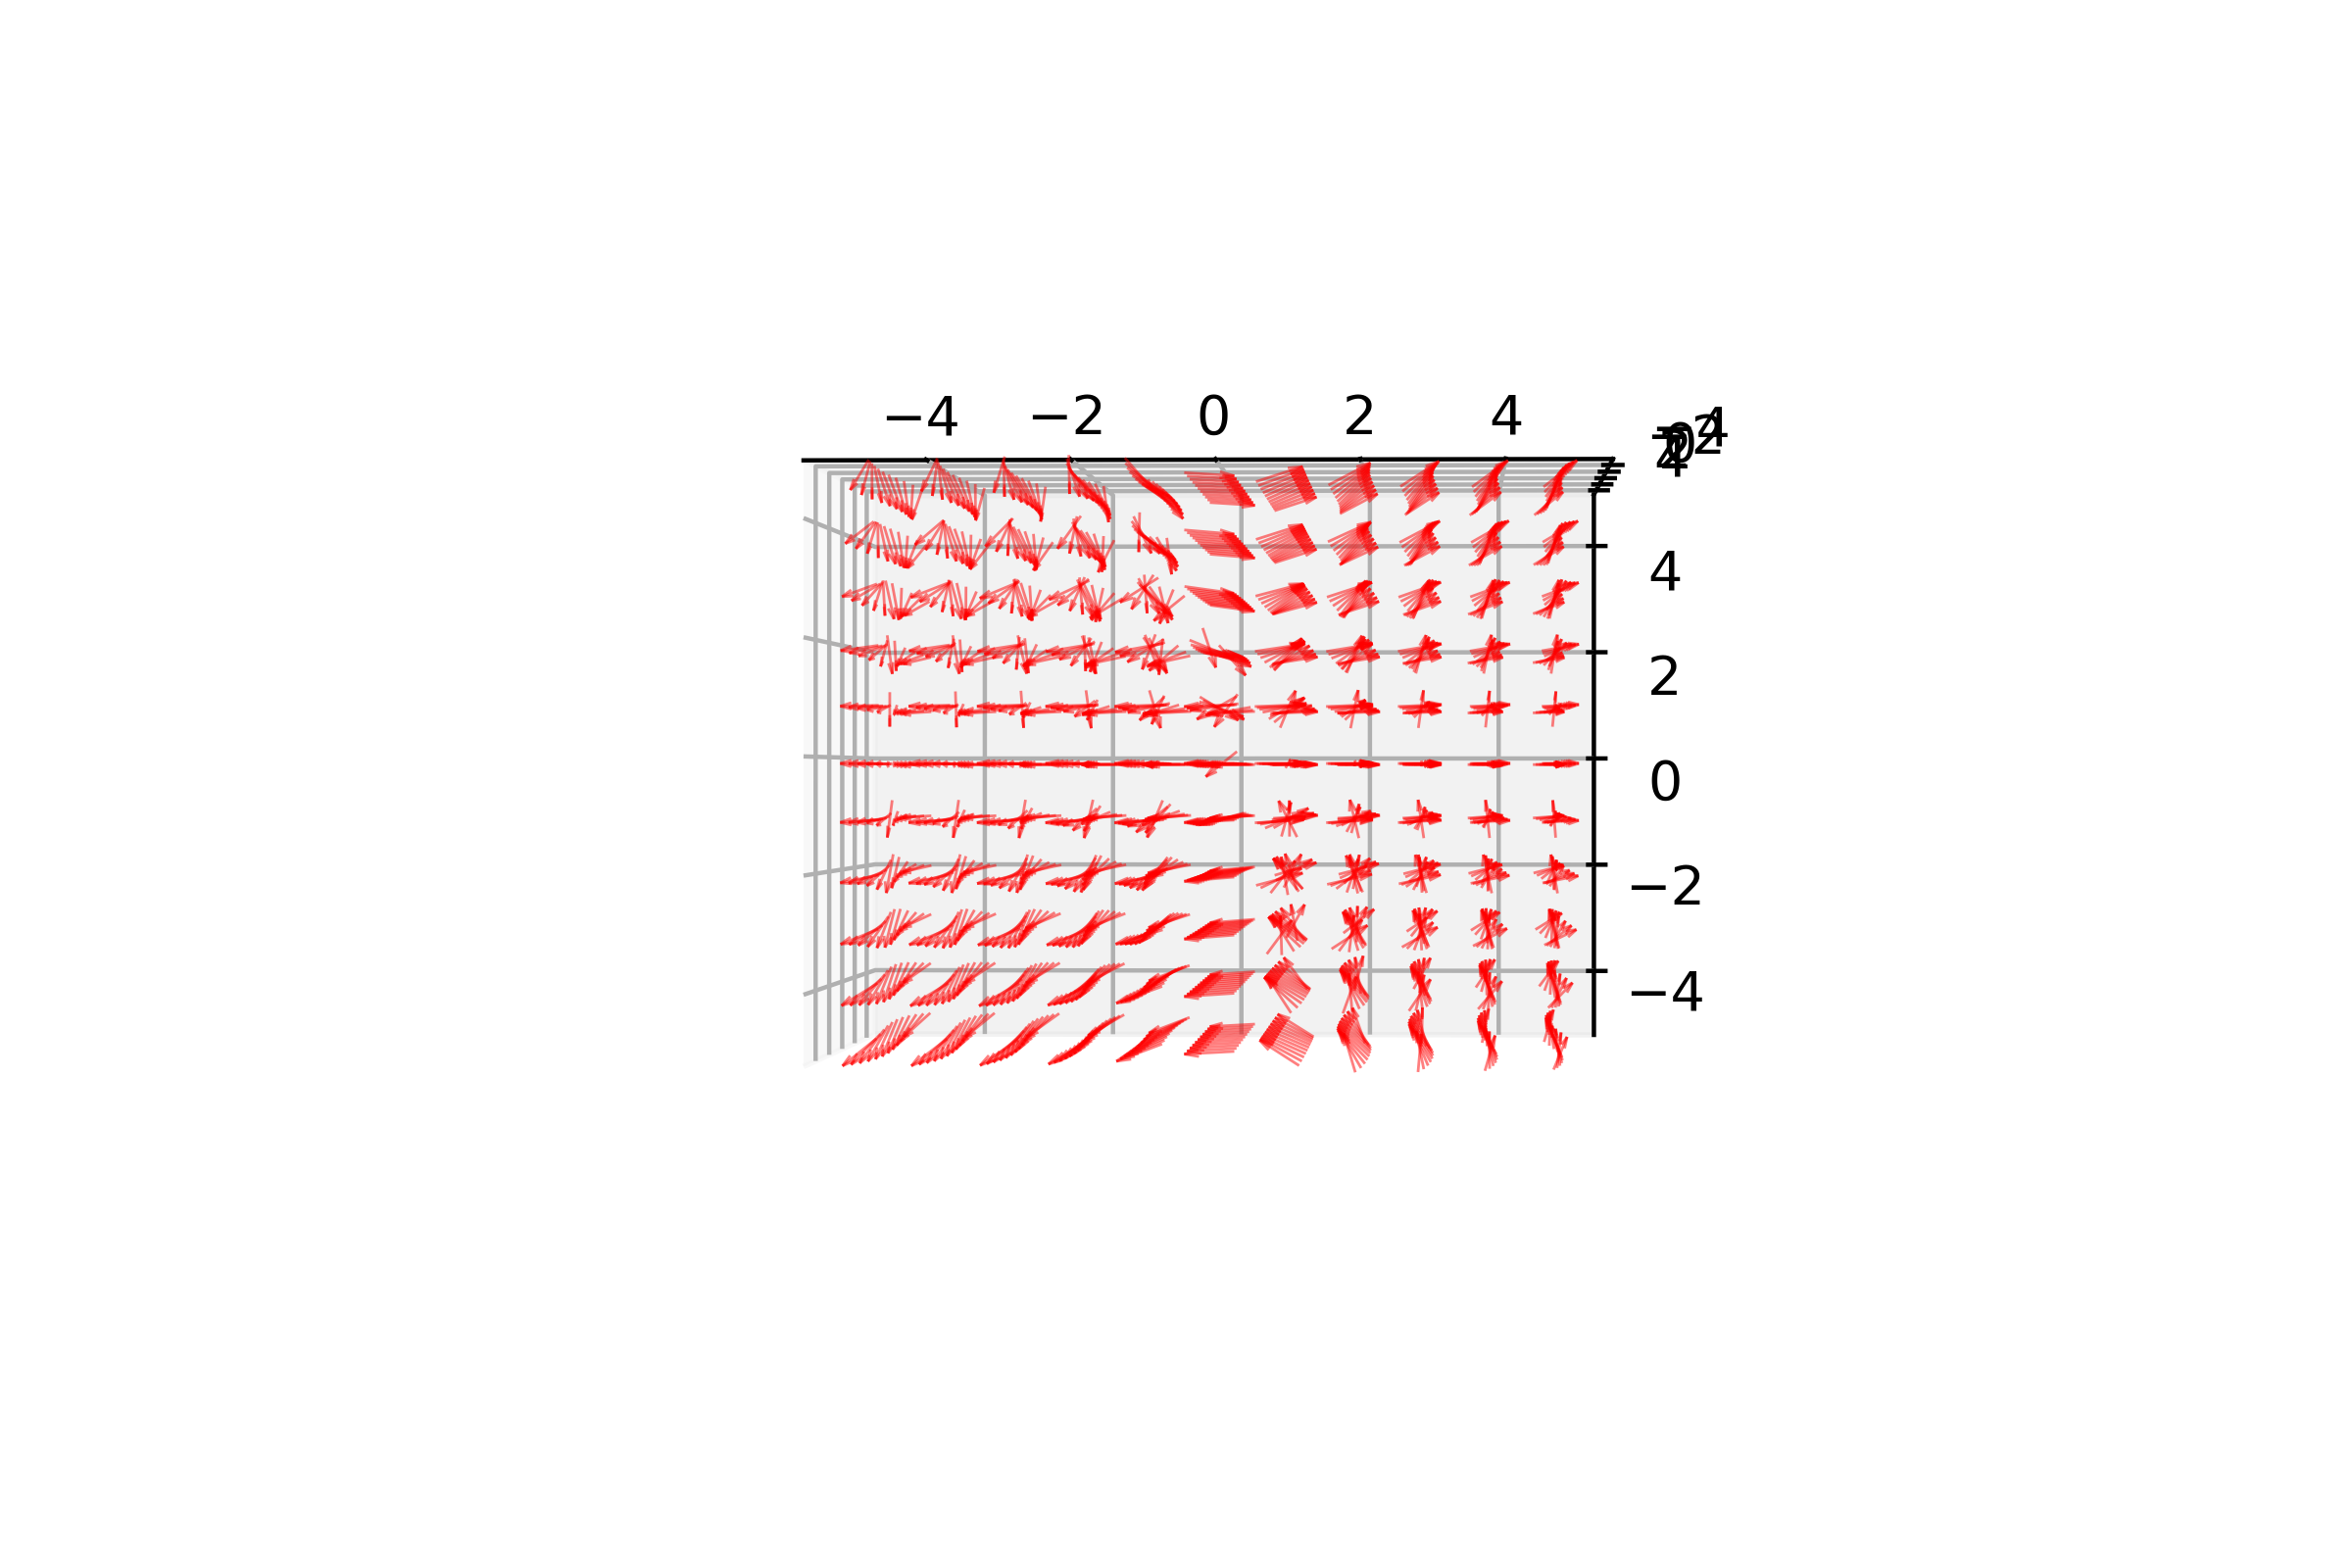

<IPython.core.display.Javascript object>


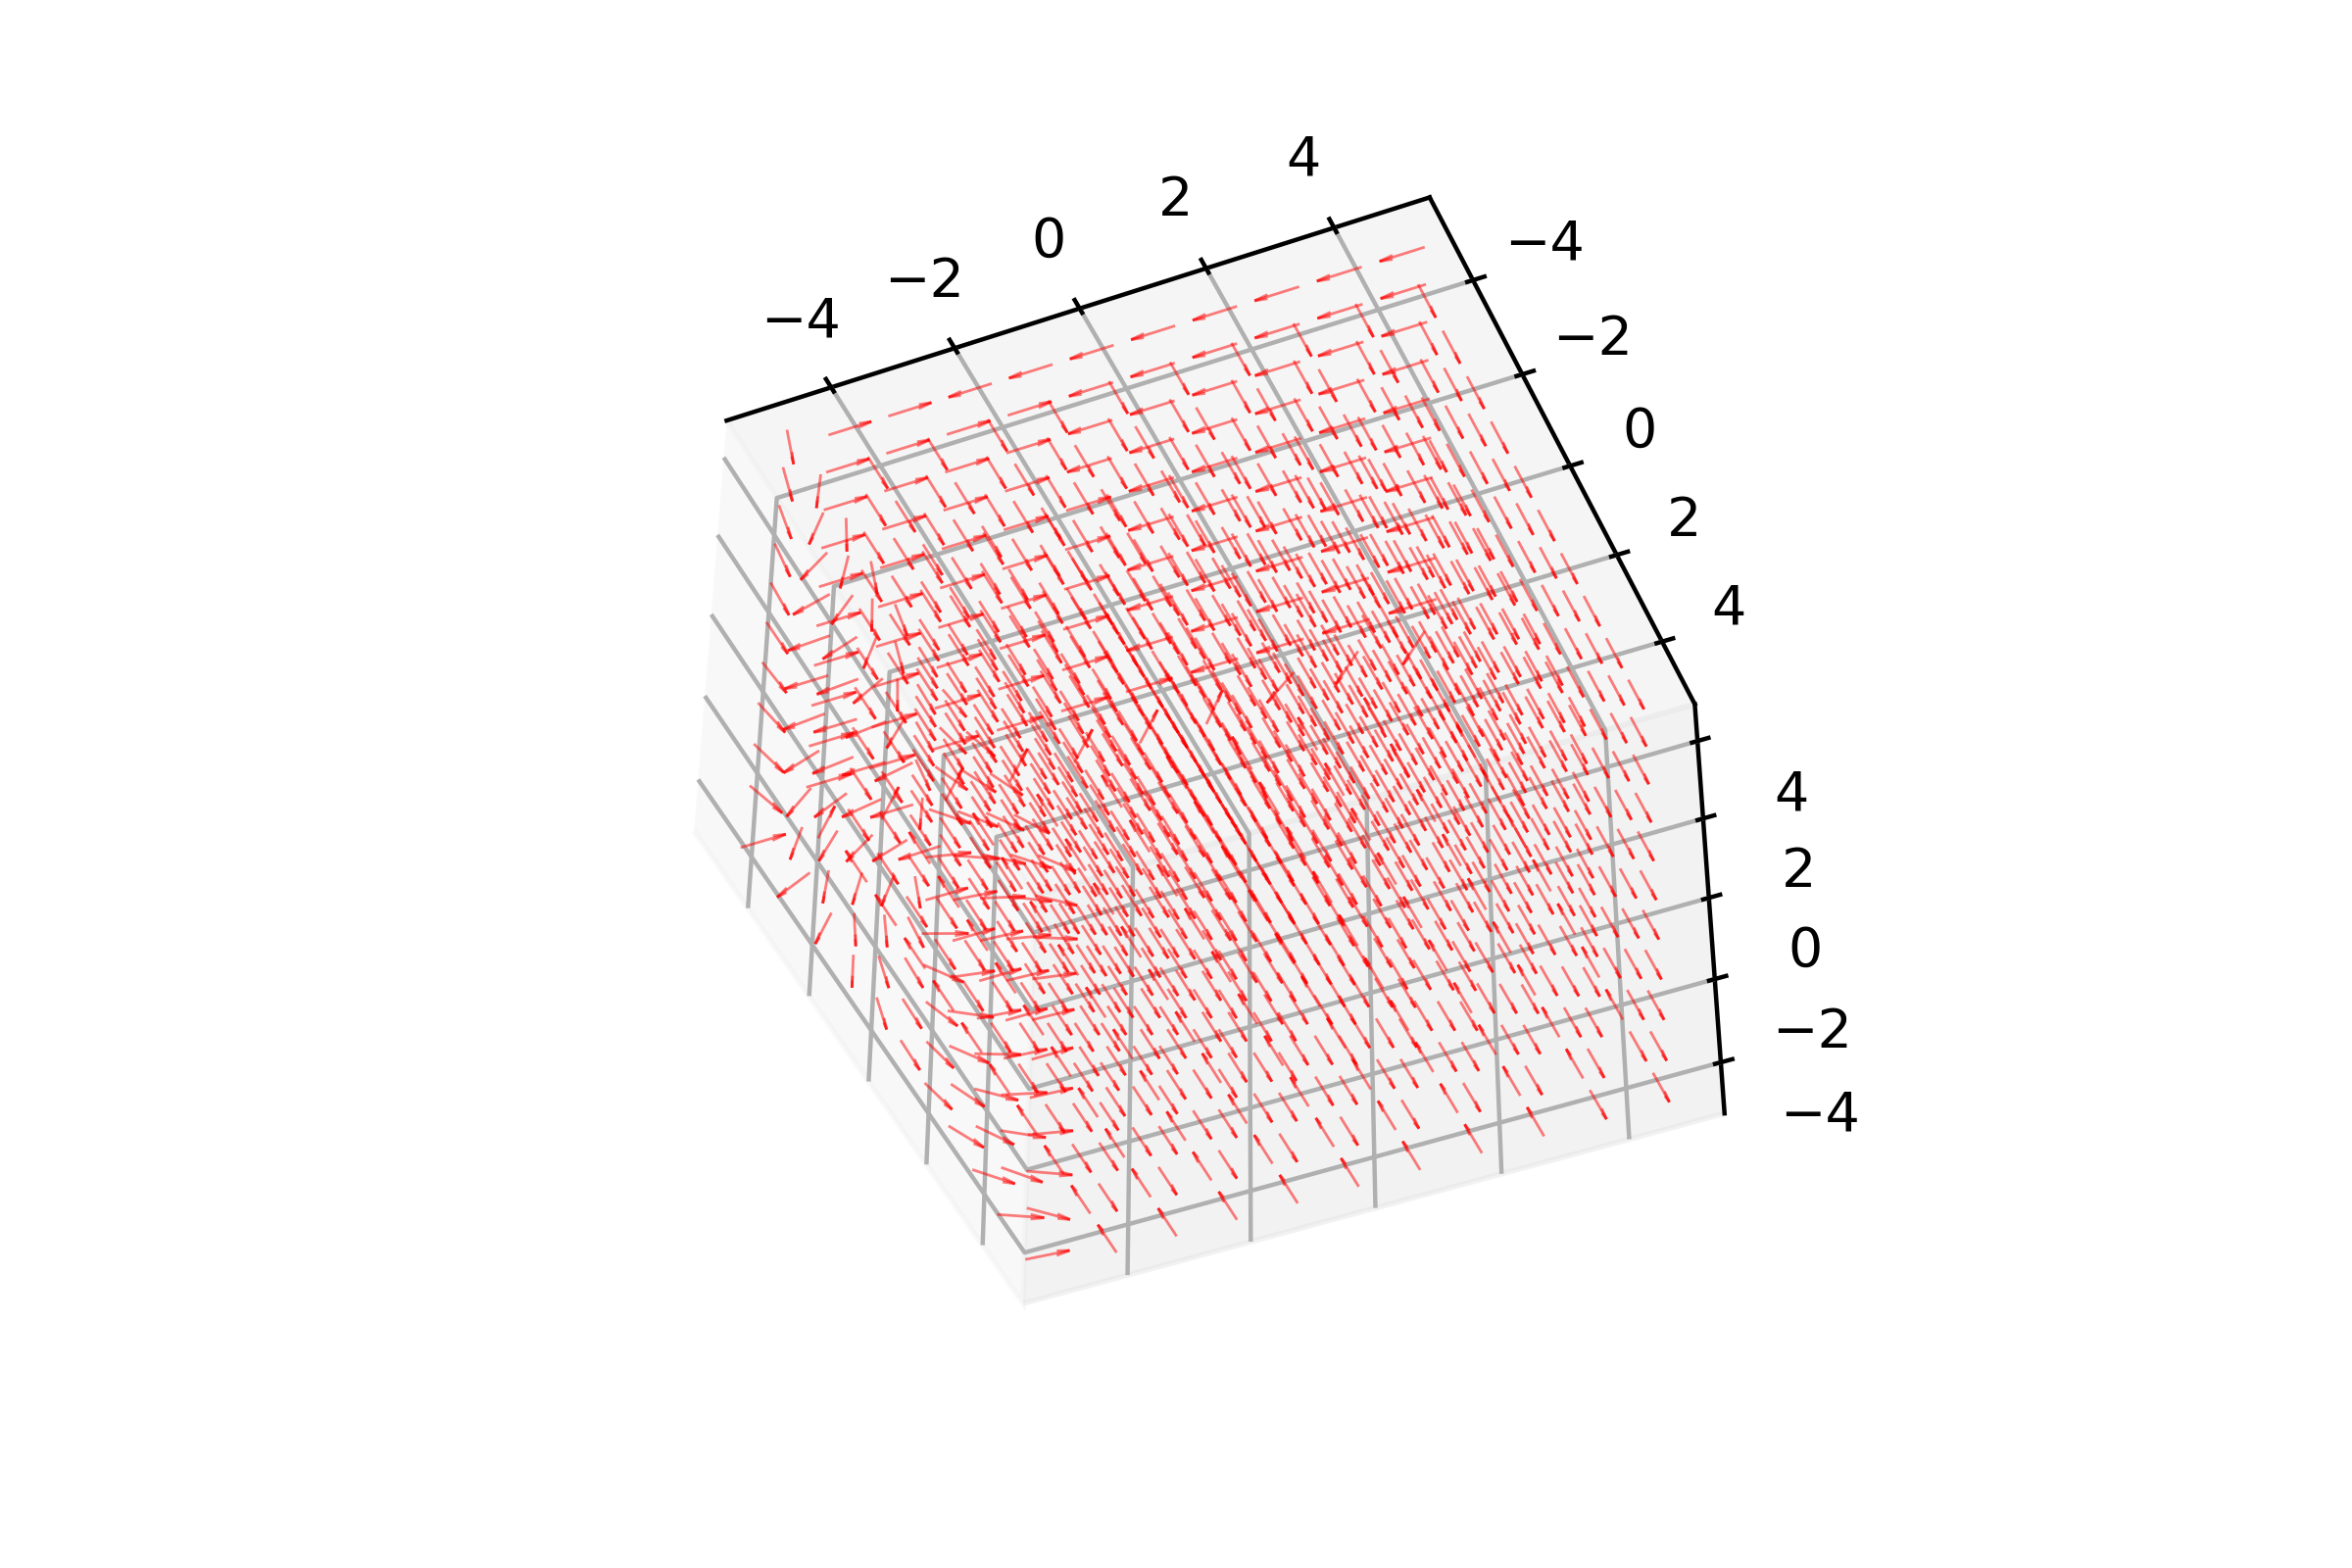

<Axes3DSubplot:>

In [7]:
## Part 3: Plotting the curl

# Define coordinate grid.
num_points = 257
box_size = 5

# Store coordinate arrays.
x,y,z = ed.coordinates(L=box_size, N=num_points)

# Compute grid spacing.
ds = x[1,0,0] - x[0,0,0]

# Store grid and spacing in a single object for repeated use later.
grid = (x,y,z,ds)

F_x = 2 * x * y**2 + z**3
F_y = 2 * x**2 * y
F_z = 3 * x * z**2
F = np.stack([F_x, F_y, F_z])

# Compute the curl.
dF = vc.curl(F,ds)

# Plot the vector field.
ed.draw_vector_field(x,y,z,*F)

# Plot the curl.
ed.draw_vector_field(x,y,z,*dF)

# Part 4: Why is curl (roughly) equal to zero?

Curl measures circulation of a field - or the integral of a vector field over a closed path. Circulation *should* theoretically be zero for any uniform vector field along a closed path. This is because all non-zero contributions cancel each other out when summed along the entire path. If we were to analyze the curl at a particular point in space it may have a positive or negative value. But when summed (or integrated) the net curl for a uniform field should be zero. 

## Gradient

Find the potential.

Since the curl of $\vec{E}$ is zero, we can write $\vec{E}$ as the gradient of a function $\phi$:
$$\nabla \times \vec{E} = 0 \qquad \implies \qquad \vec{E} = -\nabla \phi$$

Determine a function $\phi(x,y,z)$ whose gradient is $\vec{E}$.

1. Derive the scalar field $\phi$.  Use any method you like: pencil and paper, trial and error, symbolic computing, etc.
2. Define the scalar field $\phi$ on a 3D grid.
3. Plot a slice of $\phi$ for some constant $z$-values of your choice.
4. Compute the gradient, $\nabla \phi$, on the same grid.
5. Compare $-\nabla\phi$ and the original field $\vec{E}$.  Demonstrate that $\vec{E} \approx - \nabla \phi$.

For Part 5, do not simply compute the gradient.  You may not obtain strict equality due to numerical error and edge effects, but you should provide some quantitative evidence that the gradient of the function you chose is nearly equal to $\vec{E}$ nearly everywhere.

# Part 1: Deriving a scalar field

The electric field of a point charge can be derived with only a few variables, and is an expression of Coulomb's Law.

By combining the following:

Electric field = (electric force)/(charge)
and
Electric force = (k*q1*q2)/(r^2) --> for point charges q1, q2

We can derive the following:

E = (kQ)/(r^2)

Where:
k = Coulomb's constant (approximately 9*10^9 Newtons meters-squared per Coulomb-squared)
Q = Source charge (point charge in our case)
r = Radius (field strength at a given radius)

We can treat the field from a point charge as a sphere of radius 'r' with the same potential at each point on the sphere. 

The code to input and plot an electric field was adapted from earlier Python assignments in this class and can be seen below. 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


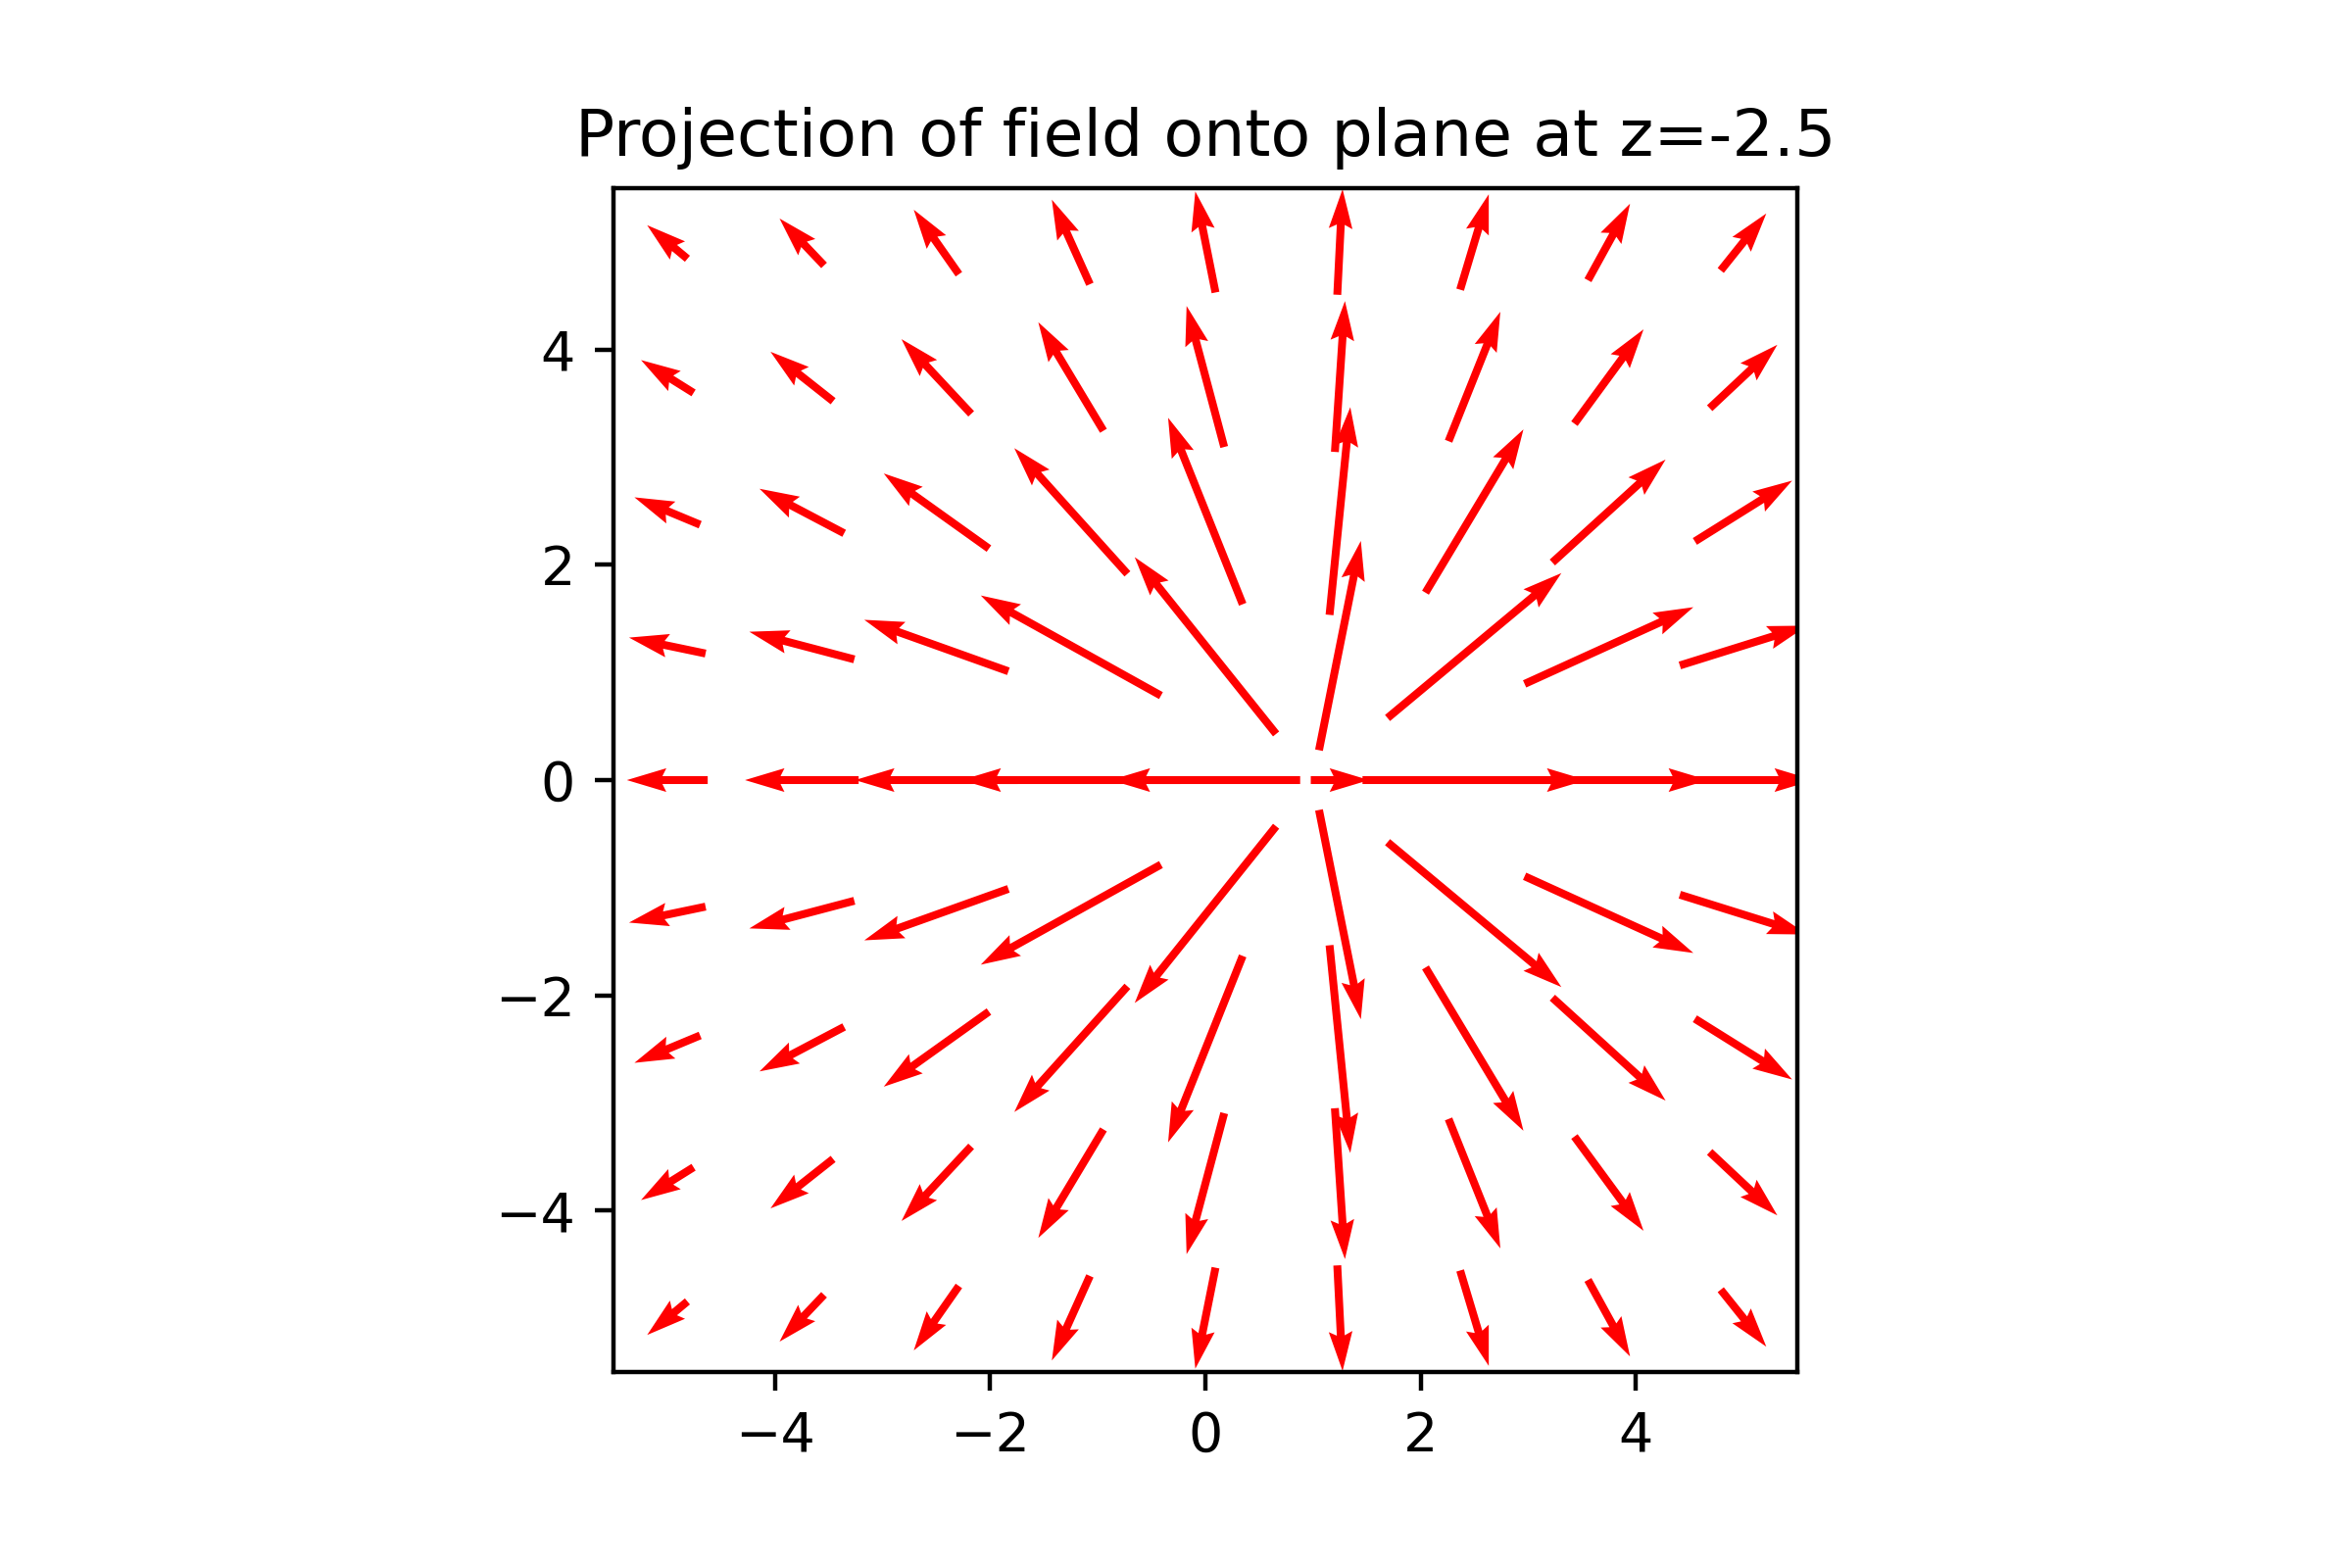

(-5.5, 5.5, -5.5, 5.5)

In [29]:
# Parts 1, 2, and 3: Defining and plotting the scalar field on a 3D quiver plot and a slice on a 2D grid

def coordinates(charge=2.5, location=(1,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    
    return X, Y, Z

def potential(charge=2.5, location=(1,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    V = q/R
    
    return V

def field(charge=2.5, location=(1,0,0), box_size=5, grid_points=201, epsilon=1e-6):
    x0, y0, z0 = location
    q = charge

    s = np.linspace(-box_size, box_size, grid_points)
    X,Y,Z = np.meshgrid(s,s,s, indexing='ij')
    R = np.sqrt((X-x0)**2 + (Y-y0)**2 + (Z-z0)**2 + epsilon**2)
    Ex = q*(X-x0)/R**3
    Ey = q*(Y-y0)/R**3
    Ez = q*(Z-z0)/R**3
    
    return Ex, Ey, Ez

X, Y, Z = coordinates()
V = potential()
Ex, Ey, Ez = field()

# Building a 3D quiver plot

stride = 40
x = X[::stride,::stride,::stride].copy()
y = Y[::stride,::stride,::stride].copy()
z = Z[::stride,::stride,::stride].copy()
ex = Ex[::stride,::stride,::stride].copy()
ey = Ey[::stride,::stride,::stride].copy()
ez = Ez[::stride,::stride,::stride].copy()

ecut = 10
ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ez[ez>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut
ez[ez<-ecut] = -ecut

# Building a 2D slice of the field at a specific z-value

z0 = 50
z_val = Z[0,0,z0]

stride = 25
x = X[::stride,::stride,z0].copy()
y = Y[::stride,::stride,z0].copy()
ex = Ex[::stride,::stride,z0].copy()
ey = Ey[::stride,::stride,z0].copy()

ex[ex>ecut] = ecut
ey[ey>ecut] = ecut
ex[ex<-ecut] = -ecut
ey[ey<-ecut] = -ecut

fig = plt.figure(dpi=200)
ax = fig.add_subplot()
ax.quiver(x,y,ex,ey, pivot='middle', scale=0.8, linewidth=0.5, color='red')
ax.set_title("Projection of field onto plane at z=%g" % z_val)
ax.axis("scaled")

<IPython.core.display.Javascript object>


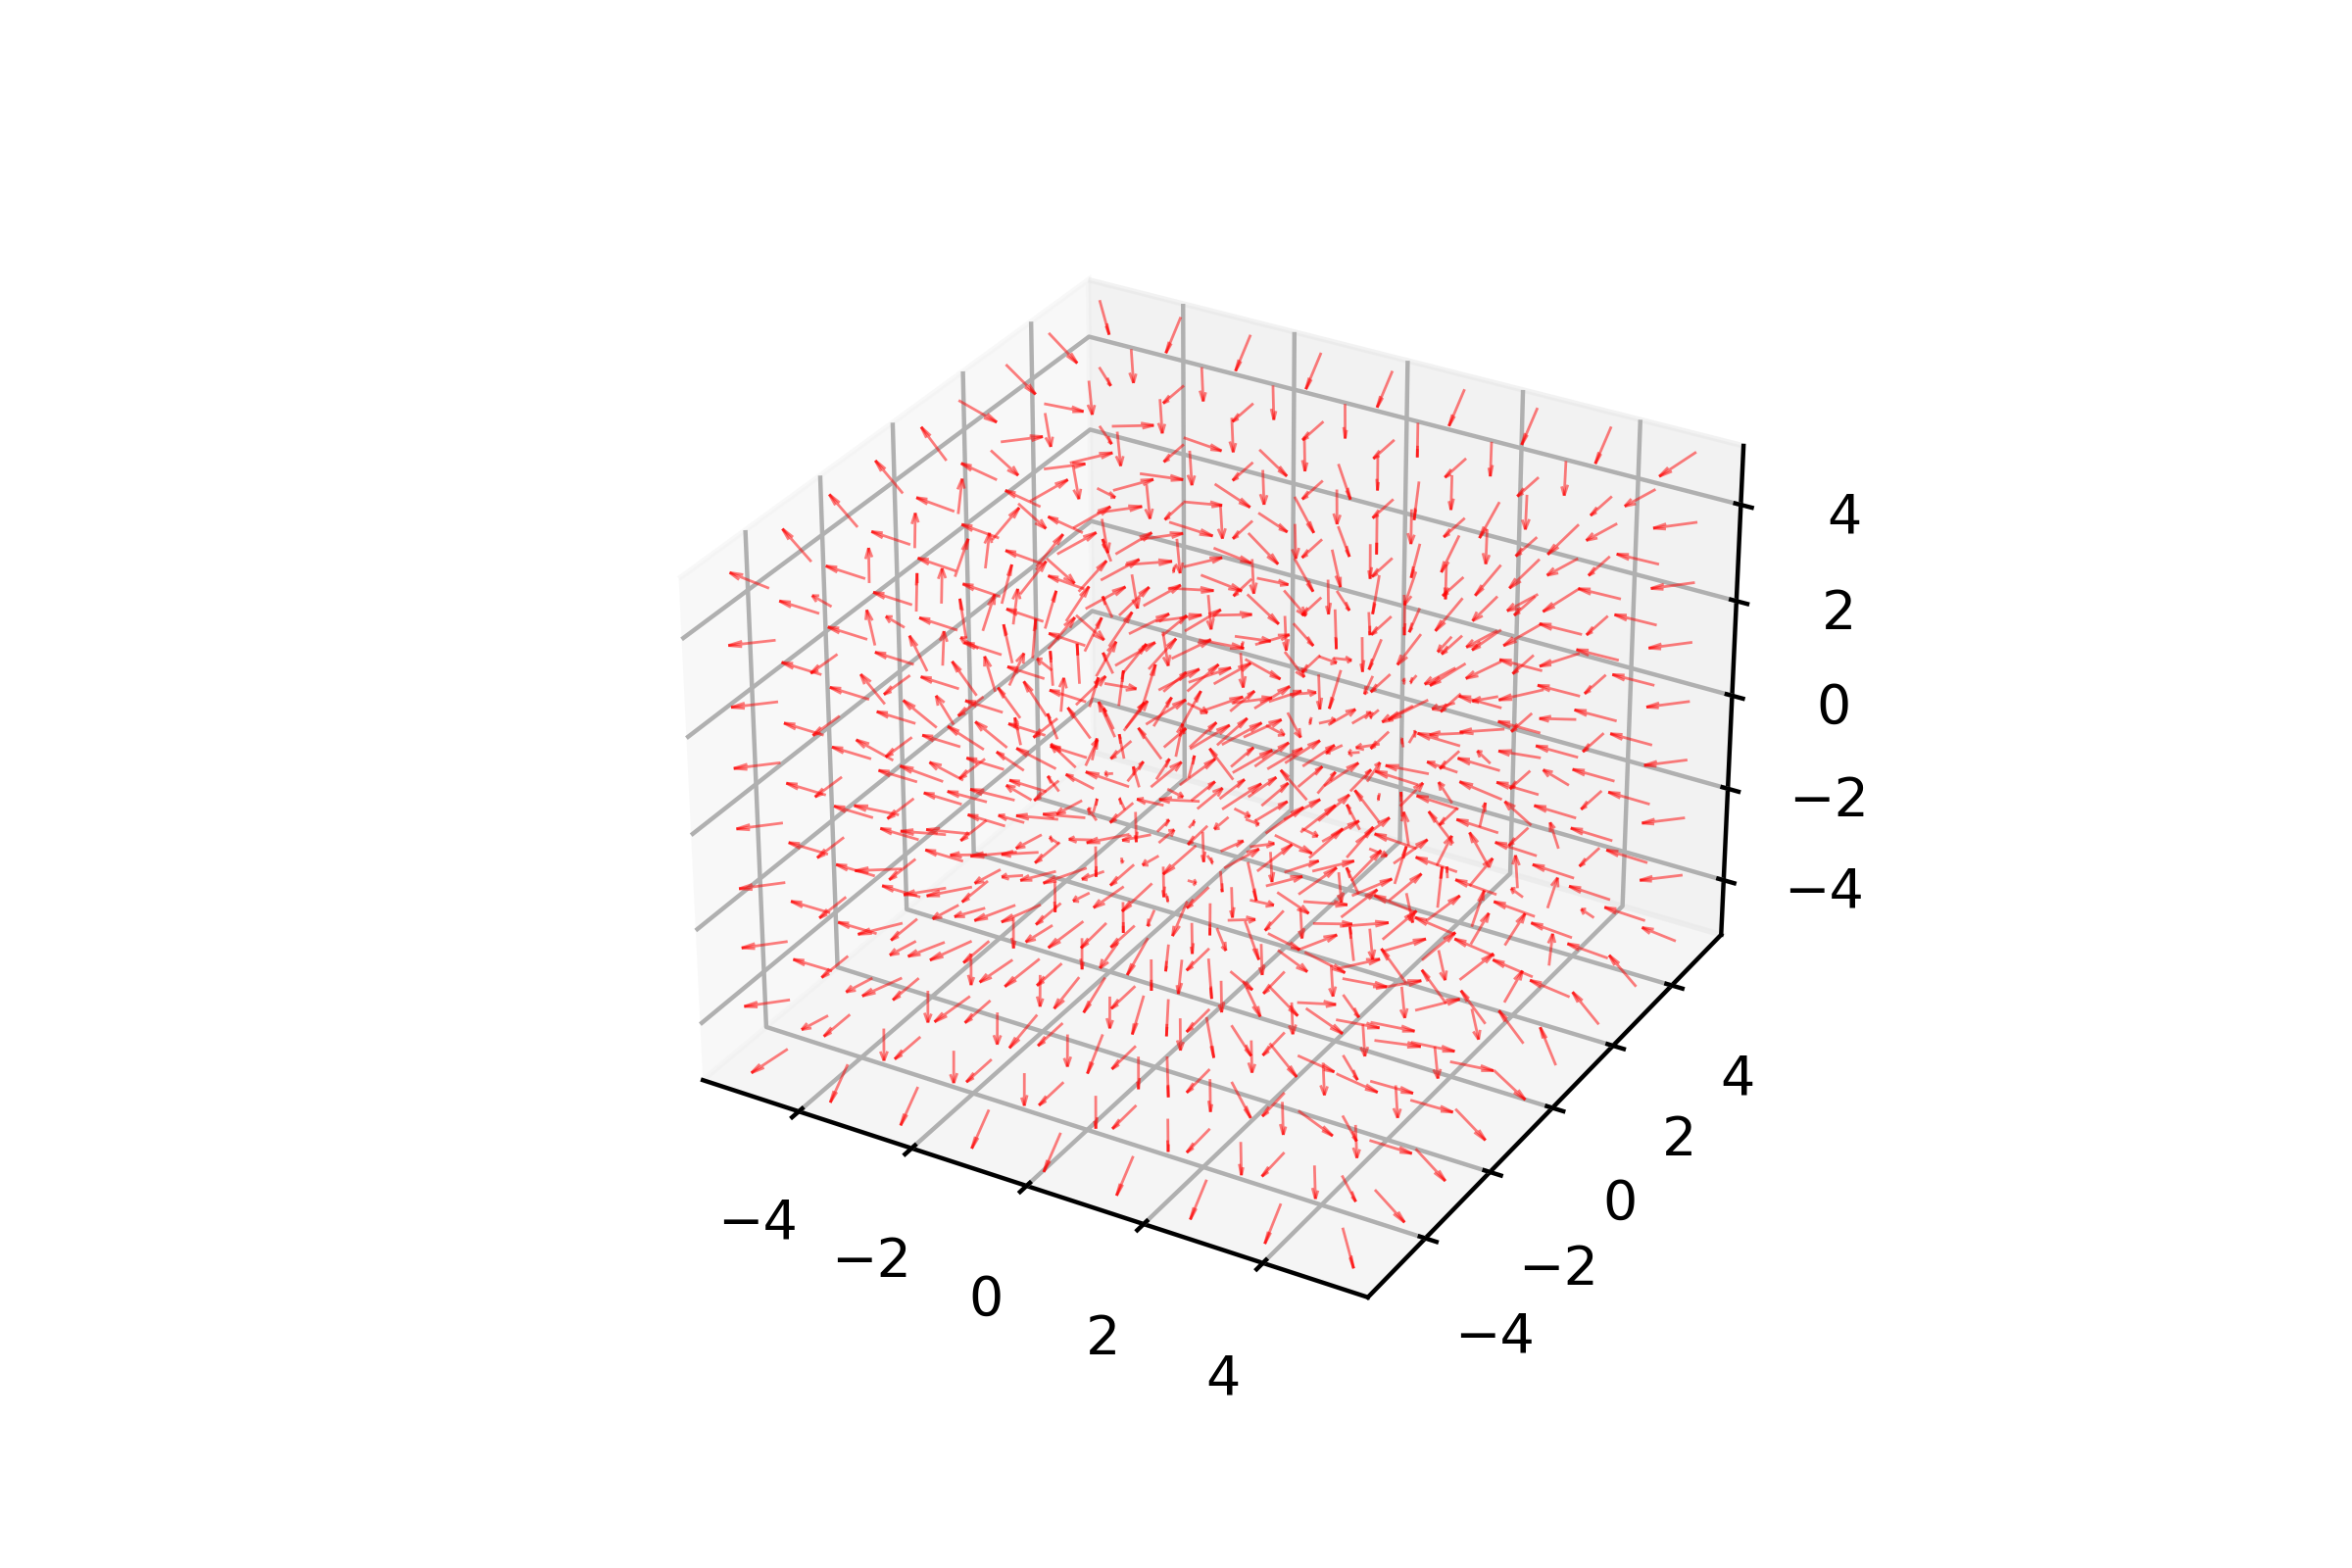

[array([[[-3.68883641e-04, -3.73548219e-04, -3.78237243e-04, ...,
          -4.57688185e-05, -4.25197203e-05, -3.93429997e-05],
         [-3.73548219e-04, -3.78302526e-04, -3.83082387e-04, ...,
          -4.56818988e-05, -4.23920018e-05, -3.91759981e-05],
         [-3.78237243e-04, -3.83082387e-04, -3.87954224e-04, ...,
          -4.55697539e-05, -4.22390366e-05, -3.89837486e-05],
         ...,
         [-4.57688185e-05, -4.56818988e-05, -4.55697539e-05, ...,
           2.96814716e-04,  2.95161452e-04,  2.93484675e-04],
         [-4.25197203e-05, -4.23920018e-05, -4.22390366e-05, ...,
           2.95161452e-04,  2.93518523e-04,  2.91852501e-04],
         [-3.93429997e-05, -3.91759981e-05, -3.89837486e-05, ...,
           2.93484675e-04,  2.91852501e-04,  2.90197642e-04]],
 
        [[-3.69608112e-04, -3.74303033e-04, -3.79022956e-04, ...,
          -4.50150754e-05, -4.17588192e-05, -3.85755371e-05],
         [-3.74303033e-04, -3.79088638e-04, -3.83900374e-04, ...,
          -4.49198035

In [30]:
# Part 4: Plotting the gradient

f = Ex+Ey+Ez # Point charge function(?)
df = vc.grad(f,ds)
ed.draw_vector_field(X,Y,Z,*df)

np.gradient(f)

## Summary and Reflection

Summarize your efforts, insights, and conclusions in the space below.
- What did you find?
- What was difficult?
- How confident are you in your work?
- What questions do you have after working through this exercise?

This was a challenge for me. I'm still not super comfortable in Python and haven't been able to dedicate enough time outside of school and work to become more confident using it. That said, I do think these exercises (while maybe poorly executed) have helped to solidify the class concepts.

First, the gradient of a function is a *vector* field found by applying the vector (del) operator to the function. The del operator, denoted by an upside-down triangle, takes the partial derivative of the function with respect to each dimension along which it operates. For example, the gradient of f(x,y,z) = (d/dx)ex + (d/dy)ey + (d/dz)ez. Each gradient vector has a magnitude and direction that matches the magnitude and direction at which the function is increasing most steeply from that point. In other words, it's an arrow that points "uphill" at each point in the field. 

Second, the curl of a function is the vector product of a vector function and the del operator. When applied to a vector field, curl measures the circulation of that field. 

We can visualize a function's gradient as an imaginary hill with different potentials (elevations) at each point, eventually climbing toward an apex. A curl can be thought of as a looping path that starts and stops at the same point (or potential). However, since the gradient is always looking uphill toward the hill's apex, a looping path would start at one elevation and end at another. This is a paradox. Since you cannot walk in a circular path up the hill and end up exactly where you started, it follows that the curl of a gradient must be zero. 

I feel good about my understanding of most of the concepts we've covered in class and these exercises, but I am less confident in my practical application of the concepts through coding and book problems. The greek symbols and proofs in the book still mess with my brain's ability to translate the concepts into usable, intuitive formulas for homework. If possible, it would be helpful to spend more time in class watching both professors solve homework or problems on the board. I will bring this up in lecture tomorrow.